### Alice creates her key, encodes it with her bases, and tries to send it to Bob

In [1]:
from random import choices
import cirq

num_bits = 20

encode_gates = {0: cirq.I, 1: cirq.X} # Gates that produce the 0 and 1 quantums states, which represents the keys
basis_gates = {"Z": cirq.I, "X": cirq.H} # Gates that will create the correct qubit encryption

message = "Quantum Computing"

alice_key = choices([0, 1], k = num_bits)
print("Alice Key: ", alice_key)
alice_bases = choices(['Z', 'X'], k = num_bits)
print("Alice Bases: ", alice_bases)

alice_circuit = cirq.Circuit()
qubits = cirq.NamedQubit.range(num_bits, prefix = 'q')

for bit in range(num_bits):

 encode_value = alice_key[bit]
 encode_gate = encode_gates[encode_value]

 basis_value = alice_bases[bit]
 basis_gate = basis_gates[basis_value]

 qubit = qubits[bit]
 alice_circuit.append(encode_gate(qubit))
 alice_circuit.append(basis_gate(qubit))

Alice Key:  [1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
Alice Bases:  ['Z', 'Z', 'X', 'X', 'Z', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'Z', 'X']


### Alice sends her encrypted key to Bob, IN A NOISY ENVIRONMENT!

In [3]:
noisy_circuit = cirq.Circuit()
qubits = cirq.NamedQubit.range(num_bits, prefix = 'q')

noise = cirq.depolarize(0.05)
noisy_circuit.append(noise.on_each(qubits))

print(noisy_circuit)

q0: ────D(0.05)───

q1: ────D(0.05)───

q2: ────D(0.05)───

q3: ────D(0.05)───

q4: ────D(0.05)───

q5: ────D(0.05)───

q6: ────D(0.05)───

q7: ────D(0.05)───

q8: ────D(0.05)───

q9: ────D(0.05)───

q10: ───D(0.05)───

q11: ───D(0.05)───

q12: ───D(0.05)───

q13: ───D(0.05)───

q14: ───D(0.05)───

q15: ───D(0.05)───

q16: ───D(0.05)───

q17: ───D(0.05)───

q18: ───D(0.05)───

q19: ───D(0.05)───


### Create Bob's decryption circuit

In [5]:
bob_circuit = cirq.Circuit()
bob_bases = choices(['Z', 'X'], k = num_bits)
for bit in range(num_bits):
    basis_value = bob_bases[bit]
    basis_gate = basis_gates[basis_value]

    qubit = qubits[bit]
    bob_circuit.append(basis_gate(qubit))
    
bob_circuit.append(cirq.measure(qubits, key = 'bob key'))
bob_circuit

q0: ────H───M('bob key')───
            │
q1: ────H───M──────────────
            │
q2: ────I───M──────────────
            │
q3: ────H───M──────────────
            │
q4: ────I───M──────────────
            │
q5: ────I───M──────────────
            │
q6: ────H───M──────────────
            │
q7: ────I───M──────────────
            │
q8: ────H───M──────────────
            │
q9: ────I───M──────────────
            │
q10: ───I───M──────────────
            │
q11: ───I───M──────────────
            │
q12: ───I───M──────────────
            │
q13: ───H───M──────────────
            │
q14: ───H───M──────────────
            │
q15: ───H───M──────────────
            │
q16: ───H───M──────────────
            │
q17: ───H───M──────────────
            │
q18: ───H───M──────────────
            │
q19: ───H───M──────────────

### Create Bob key

In [6]:
bb84_circuit = alice_circuit + noisy_circuit + bob_circuit

print(bb84_circuit)
sim = cirq.Simulator()
results = sim.run(bb84_circuit)
bob_key = results.measurements['bob key'][0]


print(bob_key)

q0: ────X───I───D(0.05)───H───M('bob key')───
                              │
q1: ────X───I───D(0.05)───H───M──────────────
                              │
q2: ────I───H───D(0.05)───I───M──────────────
                              │
q3: ────I───H───D(0.05)───H───M──────────────
                              │
q4: ────X───I───D(0.05)───I───M──────────────
                              │
q5: ────X───I───D(0.05)───I───M──────────────
                              │
q6: ────X───H───D(0.05)───H───M──────────────
                              │
q7: ────I───H───D(0.05)───I───M──────────────
                              │
q8: ────I───H───D(0.05)───H───M──────────────
                              │
q9: ────I───I───D(0.05)───I───M──────────────
                              │
q10: ───I───I───D(0.05)───I───M──────────────
                              │
q11: ───I───I───D(0.05)───I───M──────────────
                              │
q12: ───X───H───D(0.05)───I───M──────────────
                  

### Simulate the circuit, create final shared keys, and compare how similar the keys are
* Ok, I know I'm smooshing a lot of stuff into one big function. I'll probably fix this later 

The percentage of values in Alice and Bob's shared keys that match is  95.81818181818177 %


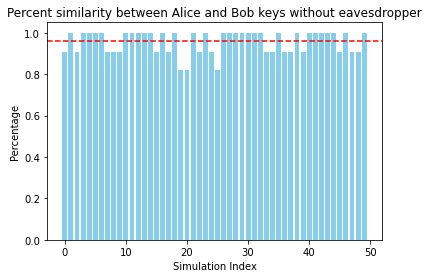

In [8]:
def simulate():
    '''
    Create Bob's key
    '''
    sim = cirq.Simulator()
    results = sim.run(bb84_circuit)
    bob_key = results.measurements['bob key'][0]
    
    '''
    Create final shared keys
    '''
    final_alice_key = []
    final_bob_key = []

    for bit in range(num_bits):
        if alice_bases[bit] == bob_bases[bit]:
            final_alice_key.append(alice_key[bit])
            final_bob_key.append(bob_key[bit])

    '''
    Create the percentage of same elements in Alice and Bob's respective keys
    '''    
    total_agree = 0
    for i in range(len(final_bob_key)):
        if final_bob_key[i]==final_alice_key[i]:
            total_agree += 1
    return (total_agree/len(final_alice_key))

 
num_runs = 50
percentages = []
for i in range(num_runs):
    percentages.append(simulate())

import matplotlib.pyplot as plt

def bar_chart(percentage_list):
    # Define the x-axis values as indices of the list
    x_values = range(len(percentage_list))
    average_percentage = sum(percentage_list) / len(percentage_list)
    print("The percentage of values in Alice and Bob's shared keys that match is " , (average_percentage*100), "%")
    # Create a bar chart
    plt.bar(x_values, percentage_list, color='skyblue')
    
    # Add labels and title
    plt.xlabel('Simulation Index')
    plt.ylabel('Percentage')
    plt.title('Percent similarity between Alice and Bob keys without eavesdropper')
    
    plt.axhline(y=average_percentage, color='red', linestyle='--', label=f'Average: {average_percentage*100:.1f}%')
    # Show plot
    plt.show()

bar_chart(percentages)


### Ok, so 5% depolarizing noise yields 95% similarity in the keys. Thats ok...

### ... Let's try 25% depolarizing noise!

q0: ────X───I───D(0.25)───H───M('bob key')───
                              │
q1: ────X───I───D(0.25)───H───M──────────────
                              │
q2: ────I───H───D(0.25)───I───M──────────────
                              │
q3: ────I───H───D(0.25)───H───M──────────────
                              │
q4: ────X───I───D(0.25)───I───M──────────────
                              │
q5: ────X───I───D(0.25)───I───M──────────────
                              │
q6: ────X───H───D(0.25)───H───M──────────────
                              │
q7: ────I───H───D(0.25)───I───M──────────────
                              │
q8: ────I───H───D(0.25)───H───M──────────────
                              │
q9: ────I───I───D(0.25)───I───M──────────────
                              │
q10: ───I───I───D(0.25)───I───M──────────────
                              │
q11: ───I───I───D(0.25)───I───M──────────────
                              │
q12: ───X───H───D(0.25)───I───M──────────────
                  

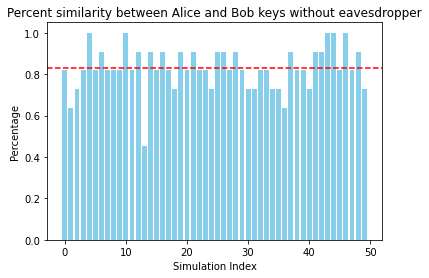

In [10]:
noisy_circuit = cirq.Circuit()
qubits = cirq.NamedQubit.range(num_bits, prefix = 'q')

noise = cirq.depolarize(0.25)
noisy_circuit.append(noise.on_each(qubits))

bb84_circuit = alice_circuit + noisy_circuit + bob_circuit

print(bb84_circuit)
sim = cirq.Simulator()
results = sim.run(bb84_circuit)
bob_key = results.measurements['bob key'][0]

num_runs = 50
percentages = []
for i in range(num_runs):
    percentages.append(simulate())

import matplotlib.pyplot as plt

def bar_chart(percentage_list):
    # Define the x-axis values as indices of the list
    x_values = range(len(percentage_list))
    average_percentage = sum(percentage_list) / len(percentage_list)
    print("The percentage of values in Alice and Bob's shared keys that match is " , (average_percentage*100), "%")
    # Create a bar chart
    plt.bar(x_values, percentage_list, color='skyblue')
    
    # Add labels and title
    plt.xlabel('Simulation Index')
    plt.ylabel('Percentage')
    plt.title('Percent similarity between Alice and Bob keys without eavesdropper')
    
    plt.axhline(y=average_percentage, color='red', linestyle='--', label=f'Average: {average_percentage*100:.1f}%')
    # Show plot
    plt.show()

bar_chart(percentages)

### Ok, so 25% depolarizing noise yields around 80% similarity. Still not so bad!

### analysis to be continued